In [28]:
%matplotlib inline


In [29]:
import numpy as np 
import pandas as pd 

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


Business problem:
Determining the best Machine Learning Model For Predicting Insurance Claim Charge.
For this, we will use a machine learning model based on a dataset with approximately 1300 records.

# Exploratory Data Analysis

In [30]:
#checking dataset information

In [31]:
df = pd.read_csv('./insurance.csv', sep=',', encoding='utf-8') 

In [32]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1336 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [34]:
df.isnull().sum()

age         0
sex         2
bmi         1
children    2
smoker      0
region      3
charges     0
dtype: int64

In [35]:
df.dtypes

age           int64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
df.describe(include="all")

age   sex          bmi    children smoker     region  \
count   1338.000000  1336  1337.000000  1336.00000   1338       1335   
unique          NaN     3          NaN         NaN      2          5   
top             NaN  male          NaN         NaN     no  southeast   
freq            NaN   674          NaN         NaN   1064        362   
mean      39.207025   NaN    30.742083     1.09506    NaN        NaN   
std       14.049960   NaN     6.679812     1.20639    NaN        NaN   
min       18.000000   NaN    15.960000     0.00000    NaN        NaN   
25%       27.000000   NaN    26.315000     0.00000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.00000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.00000    NaN        NaN   
max       64.000000   NaN   130.300000     5.00000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [37]:
df['sex'].value_counts(normalize=True, dropna=False)

male       0.503737
female     0.494021
NaN        0.001495
feemale    0.000747
Name: sex, dtype: float64

In the sex category there is a value that is miswritten and two 'null' values.

In [38]:
df['region'].value_counts(normalize=True, dropna=False)

southeast    0.270553
southwest    0.242900
northeast    0.242152
northwest    0.241405
NaN          0.002242
Southeast    0.000747
Name: region, dtype: float64

In the region category there is a value that has the first letter capitalized and has to be modified

In [39]:
df['children'].value_counts(normalize=True, dropna=False)

0.0    0.428999
1.0    0.240658
2.0    0.179372
3.0    0.117339
4.0    0.018685
5.0    0.013453
NaN    0.001495
Name: children, dtype: float64

In [40]:
df['bmi'].value_counts(normalize=True, dropna=False)

32.300    0.009716
28.310    0.006726
28.880    0.005979
30.800    0.005979
31.350    0.005979
            ...   
29.545    0.000747
37.900    0.000747
25.520    0.000747
35.090    0.000747
42.655    0.000747
Name: bmi, Length: 550, dtype: float64

In [41]:
df.corr()

age       bmi  children   charges
age       1.000000  0.108516  0.042484  0.299008
bmi       0.108516  1.000000  0.001390  0.176354
children  0.042484  0.001390  1.000000  0.068133
charges   0.299008  0.176354  0.068133  1.000000

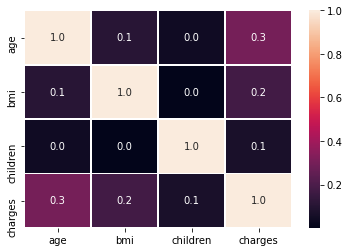

In [42]:
correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.show()

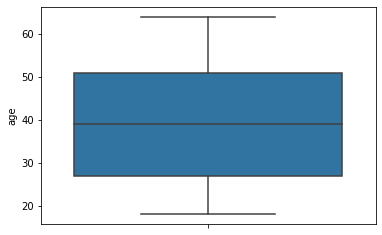

In [43]:
sns.boxplot(y='age', data=df);

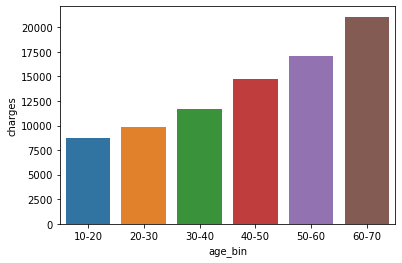

In [44]:
df['age_bin'] = pd.cut(df['age'], bins=range(10,71,10),labels=[f'{l}-{l+10}' for l in range(10,61,10)])
sns.barplot(x='age_bin', y='charges', ci=None, data=df)

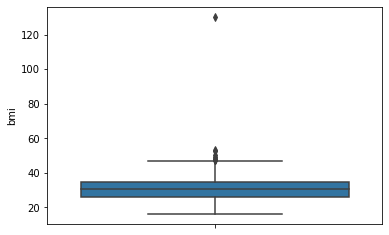

In [45]:
sns.boxplot(y='bmi', data=df);

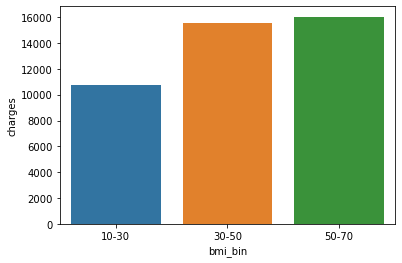

In [46]:
df['bmi_bin'] = pd.cut(df['bmi'], bins=range(10,71,20),labels=[f'{l}-{l+20}' for l in range(10,51,20)])
sns.barplot(x='bmi_bin', y='charges', ci=None, data=df)

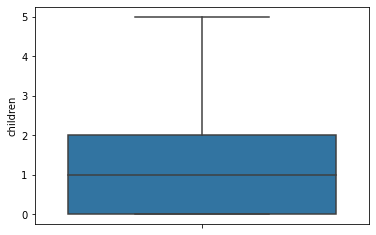

In [47]:
sns.boxplot(y='children', data=df);

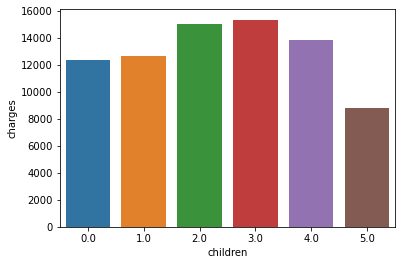

In [48]:
sns.barplot(x='children', y='charges', ci=None, data=df)

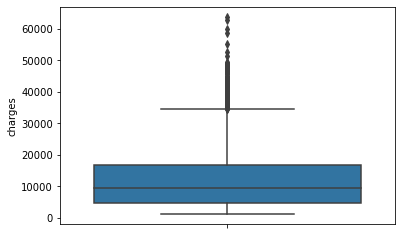

In [49]:
sns.boxplot(y='charges', data=df);

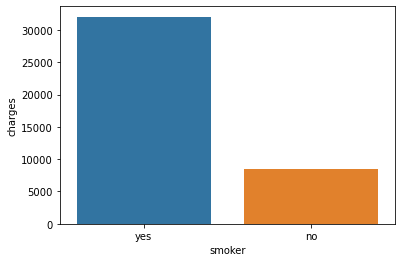

In [50]:
sns.barplot(x='smoker', y='charges', ci=None, data=df)

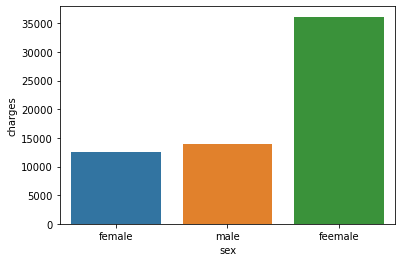

In [51]:
sns.barplot(x='sex', y='charges', ci=None, data=df)

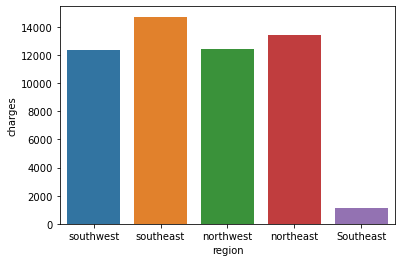

In [52]:
sns.barplot(x='region', y='charges', ci=None, data=df)

# Data Preparation

In [53]:
dataset = df.copy()

In [54]:
dataset = dataset.dropna(subset=['sex', 'children', 'region'])

In [55]:
dataset.head(5)

age     sex     bmi  children smoker     region      charges age_bin  \
0   19  female  27.900       0.0    yes  southwest  16884.92400   10-20   
1   18    male  33.770       1.0     no  southeast   1725.55230   10-20   
2   28    male  33.000       3.0     no  southeast   4449.46200   20-30   
3   33    male  22.705       0.0     no  northwest  21984.47061   30-40   
4   32    male  28.880       0.0     no  northwest   3866.85520   30-40   

  bmi_bin  
0   10-30  
1   30-50  
2   30-50  
3   10-30  
4   10-30

In [56]:
dataset.isnull().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      0
charges     0
age_bin     0
bmi_bin     2
dtype: int64

In [57]:
# checking duplicates
dataset[dataset.duplicated(keep=False)]

age   sex    bmi  children smoker     region    charges age_bin bmi_bin
195   19  male  30.59       0.0     no  northwest  1639.5631   10-20   30-50
581   19  male  30.59       0.0     no  northwest  1639.5631   10-20   30-50

In [58]:
# removing duplicates
dataset.drop_duplicates(keep=False, inplace=True)

In [59]:
# removing outliers
dataset.drop(dataset.loc[dataset['bmi']== 130.3].index, inplace=True)

In [60]:
# cheking new maximum value
dataset['bmi'].max()

53.13

In [61]:
# correcting words miswritten
dataset.loc[dataset['sex']=='feemale','sex']='female'

In [62]:
dataset['sex'].value_counts(normalize=True, dropna=False)

male      0.503012
female    0.496988
Name: sex, dtype: float64

In [63]:
dataset.loc[ dataset['region']=='Southeast','region'] = 'southeast'

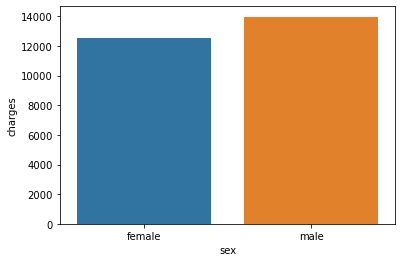

In [64]:
sns.barplot(x='sex', y='charges', ci=None, data=dataset)

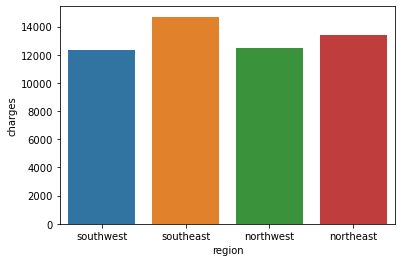

In [65]:
sns.barplot(x='region', y='charges', ci=None, data=dataset)

In [66]:
# one hot enconding
gender = pd.get_dummies(dataset['sex'], prefix='sex')
dataset = pd.concat([dataset, gender], axis=1)
dataset = dataset.drop(['sex'], axis=1)

In [67]:
smokes = pd.get_dummies(dataset['smoker'], prefix='smoker')
dataset = pd.concat([dataset, smokes], axis=1)
dataset = dataset.drop(['smoker'], axis=1)

In [68]:
zone = pd.get_dummies(dataset['region'], prefix='region')
dataset = pd.concat([dataset, zone], axis=1)
dataset = dataset.drop(['region'], axis=1)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1328 non-null   int64   
 1   bmi               1327 non-null   float64 
 2   children          1328 non-null   float64 
 3   charges           1328 non-null   float64 
 4   age_bin           1328 non-null   category
 5   bmi_bin           1327 non-null   category
 6   sex_female        1328 non-null   uint8   
 7   sex_male          1328 non-null   uint8   
 8   smoker_no         1328 non-null   uint8   
 9   smoker_yes        1328 non-null   uint8   
 10  region_northeast  1328 non-null   uint8   
 11  region_northwest  1328 non-null   uint8   
 12  region_southeast  1328 non-null   uint8   
 13  region_southwest  1328 non-null   uint8   
dtypes: category(2), float64(3), int64(1), uint8(8)
memory usage: 105.1 KB


In [70]:
# correlation with all variables after OHE
dataset.corr()

age       bmi  children   charges  sex_female  \
age               1.000000  0.111248  0.041060  0.295253    0.021203   
bmi               0.111248  1.000000  0.013306  0.200160   -0.046098   
children          0.041060  0.013306  1.000000  0.066339   -0.020710   
charges           0.295253  0.200160  0.066339  1.000000   -0.058127   
sex_female        0.021203 -0.046098 -0.020710 -0.058127    1.000000   
sex_male         -0.021203  0.046098  0.020710  0.058127   -1.000000   
smoker_no         0.028552 -0.004073 -0.005331 -0.789045    0.077061   
smoker_yes       -0.028552  0.004073  0.005331  0.789045   -0.077061   
region_northeast  0.003283 -0.137399 -0.025583  0.005247    0.001660   
region_northwest  0.001492 -0.137317  0.028755 -0.037473    0.013959   
region_southeast -0.013925  0.270201 -0.024678  0.072288   -0.018270   
region_southwest  0.009705 -0.006550  0.022577 -0.043032    0.003408   

                  sex_male  smoker_no  smoker_yes  region_northeast  \
age              -0.021203   0.028552   -0.028552          0.003283   
bmi               0.046098  -0.004073    0.004073         -0.137399   
children          0.020710  -0.005331    0.005331         -0.025583   
charges           0.058127  -0.789045    0.789045          0.005247   
sex_female       -1.000000   0.077061   -0.077061          0.001660   
sex_male          1.000000  -0.077061    0.077061         -0.001660   
smoker_no        -0.077061   1.000000   -1.000000         -0.002607   
smoker_yes        0.077061  -1.000000    1.000000          0.002607   
region_northeast -0.001660  -0.002607    0.002607          1.000000   
region_northwest -0.013959   0.038268   -0.038268         -0.319421   
region_southeast  0.018270  -0.068472    0.068472         -0.347703   
region_southwest -0.003408   0.035627   -0.035627         -0.320736   

                  region_northwest  region_southeast  region_southwest  
age                       0.001492         -0.013925          0.009705  
bmi                      -0.137317          0.270201         -0.006550  
children                  0.028755         -0.024678          0.022577  
charges                  -0.037473          0.072288         -0.043032  
sex_female                0.013959         -0.018270          0.003408  
sex_male                 -0.013959          0.018270         -0.003408  
smoker_no                 0.038268         -0.068472          0.035627  
smoker_yes               -0.038268          0.068472         -0.035627  
region_northeast         -0.319421         -0.347703         -0.320736  
region_northwest          1.000000         -0.345569         -0.318767  
region_southeast         -0.345569          1.000000         -0.346991  
region_southwest         -0.318767         -0.346991          1.000000

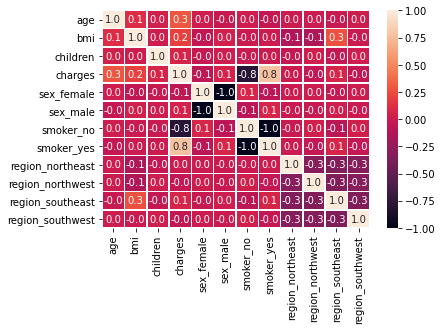

In [71]:
correlation = dataset.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.show()

In [72]:
#!pip install pandas-profiling

In [73]:
from pandas_profiling import ProfileReport

In [75]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# More Data Preparation

In [112]:
# spliting the dataset in variables X and target y
X = dataset.drop(['charges', 'age_bin', 'bmi_bin'], axis=1)
y = dataset['charges']

In [113]:
X

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900       0.0           1         0          0           1   
1      18  33.770       1.0           0         1          1           0   
2      28  33.000       3.0           0         1          1           0   
3      33  22.705       0.0           0         1          1           0   
4      32  28.880       0.0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970       3.0           0         1          1           0   
1334   18  31.920       0.0           1         0          1           0   
1335   18  36.850       0.0           1         0          1           0   
1336   21  25.800       0.0           1         0          1           0   
1337   61  29.070       0.0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1333                 0                 1                 0                 0  
1334                 1                 0                 0                 0  
1335                 0                 0                 1                 0  
1336                 0                 0                 0                 1  
1337                 0                 1                 0                 0  

[1328 rows x 11 columns]

In [114]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1328, dtype: float64

In [115]:
X.isnull().sum()

age                 0
bmi                 1
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [116]:
# spliting the data in training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [117]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(8825.08600     0.000942
 1131.50660     0.000942
 1980.07000     0.000942
 5257.50795     0.000942
 43813.86610    0.000942
                  ...   
 33471.97189    0.000942
 12032.32600    0.000942
 8125.78450     0.000942
 2902.90650     0.000942
 9140.95100     0.000942
 Name: charges, Length: 1062, dtype: float64,
 2480.97910     0.003759
 3847.67400     0.003759
 2643.26850     0.003759
 28476.73499    0.003759
 12646.20700    0.003759
                  ...   
 10795.93733    0.003759
 14313.84630    0.003759
 2731.91220     0.003759
 7623.51800     0.003759
 8988.15875     0.003759
 Name: charges, Length: 266, dtype: float64)

In [118]:
# imputing a bmi NAN value using median strategy
from sklearn.impute import SimpleImputer
imp_bmi_median = SimpleImputer(missing_values=np.nan, strategy='median')

X_train = X_train.copy()
X_test = X_test.copy()

X_train.loc[:,'bmi'] = imp_bmi_median.fit_transform(X_train[['bmi']])
X_test.loc[:,'bmi'] = imp_bmi_median.transform(X_test[['bmi']])

In [119]:
X_train.isnull().sum()

age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [120]:
#normalizing data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train.loc[:,['age','bmi','children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test.loc[:,['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [121]:
#checking data
X_train

age       bmi  children  sex_female  sex_male  smoker_no  \
1171  0.848886  0.527099  0.039483           1         0          0   
574   0.856475  0.515313  0.030052           1         0          1   
1279  0.681246  0.730023  0.054500           1         0          1   
49    0.714866  0.698980  0.019857           0         1          0   
597   0.714790  0.699023  0.021023           1         0          1   
...        ...       ...       ...         ...       ...        ...   
771   0.892568  0.449652  0.033682           1         0          1   
844   0.866765  0.498717  0.000000           0         1          1   
1226  0.913413  0.404185  0.048074           0         1          1   
566   0.683546  0.729686  0.017988           1         0          1   
692   0.525147  0.850606  0.026257           0         1          1   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
1171           1                 0                 0                 0   
574            0                 1                 0                 0   
1279           0                 0                 1                 0   
49             1                 0                 0                 1   
597            0                 1                 0                 0   
...          ...               ...               ...               ...   
771            0                 0                 0                 0   
844            0                 1                 0                 0   
1226           0                 1                 0                 0   
566            0                 0                 1                 0   
692            0                 0                 1                 0   

      region_southwest  
1171                 1  
574                  0  
1279                 0  
49                   0  
597                  0  
...                ...  
771                  1  
844                  0  
1226                 0  
566                  0  
692                  0  

[1062 rows x 11 columns]

In [122]:
X_test.describe()

age         bmi    children  sex_female    sex_male   smoker_no  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean     0.753843    0.624917    0.021561    0.518797    0.481203    0.778195   
std      0.134590    0.148736    0.025526    0.500588    0.500588    0.416243   
min      0.392026    0.292243    0.000000    0.000000    0.000000    0.000000   
25%      0.650174    0.511722    0.000000    0.000000    0.000000    1.000000   
50%      0.795036    0.604319    0.017367    1.000000    0.000000    1.000000   
75%      0.858769    0.758352    0.036524    1.000000    1.000000    1.000000   
max      0.956344    0.919954    0.108701    1.000000    1.000000    1.000000   

       smoker_yes  region_northeast  region_northwest  region_southeast  \
count  266.000000        266.000000        266.000000        266.000000   
mean     0.221805          0.236842          0.263158          0.236842   
std      0.416243          0.425946          0.441177          0.425946   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.000000          0.000000          0.000000          0.000000   
50%      0.000000          0.000000          0.000000          0.000000   
75%      0.000000          0.000000          1.000000          0.000000   
max      1.000000          1.000000          1.000000          1.000000   

       region_southwest  
count        266.000000  
mean           0.263158  
std            0.441177  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [123]:
y_train

1171    22478.60000
574     13224.05705
1279     4189.11310
49      38709.17600
597      5594.84550
           ...     
771     11150.78000
844     10072.05505
1226     6640.54485
566      6373.55735
692      2362.22905
Name: charges, Length: 1062, dtype: float64

In [124]:
y_train.describe()

count     1062.000000
mean     13224.041639
std      12121.894801
min       1121.873900
25%       4746.521225
50%       9388.753650
75%      16132.897662
max      63770.428010
Name: charges, dtype: float64

In [125]:
X_test

age       bmi  children  sex_female  sex_male  smoker_no  \
1296  0.567365  0.823467  0.000000           0         1          1   
450   0.793911  0.602558  0.081427           0         1          1   
463   0.907411  0.420245  0.000000           0         1          1   
255   0.906971  0.418278  0.049471           1         0          1   
1260  0.841793  0.539800  0.000000           1         0          1   
...        ...       ...       ...         ...       ...        ...   
469   0.598232  0.800634  0.033235           1         0          1   
807   0.460990  0.887405  0.000000           1         0          1   
621   0.733024  0.675571  0.079246           0         1          0   
198   0.942700  0.333642  0.000000           1         0          1   
244   0.915208  0.402982  0.000000           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
1296           0                 1                 0                 0   
450            0                 0                 0                 0   
463            0                 1                 0                 0   
255            0                 1                 0                 0   
1260           0                 1                 0                 0   
...          ...               ...               ...               ...   
469            0                 0                 0                 1   
807            0                 0                 1                 0   
621            1                 0                 0                 0   
198            0                 0                 1                 0   
244            1                 1                 0                 0   

      region_southwest  
1296                 0  
450                  1  
463                  0  
255                  0  
1260                 0  
...                ...  
469                  0  
807                  0  
621                  1  
198                  0  
244                  0  

[266 rows x 11 columns]

In [126]:
X_test.describe()

age         bmi    children  sex_female    sex_male   smoker_no  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean     0.753843    0.624917    0.021561    0.518797    0.481203    0.778195   
std      0.134590    0.148736    0.025526    0.500588    0.500588    0.416243   
min      0.392026    0.292243    0.000000    0.000000    0.000000    0.000000   
25%      0.650174    0.511722    0.000000    0.000000    0.000000    1.000000   
50%      0.795036    0.604319    0.017367    1.000000    0.000000    1.000000   
75%      0.858769    0.758352    0.036524    1.000000    1.000000    1.000000   
max      0.956344    0.919954    0.108701    1.000000    1.000000    1.000000   

       smoker_yes  region_northeast  region_northwest  region_southeast  \
count  266.000000        266.000000        266.000000        266.000000   
mean     0.221805          0.236842          0.263158          0.236842   
std      0.416243          0.425946          0.441177          0.425946   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.000000          0.000000          0.000000          0.000000   
50%      0.000000          0.000000          0.000000          0.000000   
75%      0.000000          0.000000          1.000000          0.000000   
max      1.000000          1.000000          1.000000          1.000000   

       region_southwest  
count        266.000000  
mean           0.263158  
std            0.441177  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [127]:
y_test

1296     1708.92575
450      7512.26700
463     11165.41765
255     13047.33235
1260     4544.23480
           ...     
469      2201.09710
807      2136.88225
621     40182.24600
198      9644.25250
244     29523.16560
Name: charges, Length: 266, dtype: float64

In [128]:
y_test.describe()

count      266.000000
mean     13468.425712
std      12121.507772
min       1135.940700
25%       4788.915925
50%       9174.742775
75%      18100.732842
max      55135.402090
Name: charges, dtype: float64

In [131]:
ProfileReport(X_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Modeling

In [132]:
#!pip install lightgbm

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor

In [134]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

clf_dt = DecisionTreeRegressor(random_state=0)
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestRegressor(random_state=0)
clf_rf.fit(X_train, y_train)

clf_sgd = SGDRegressor(random_state=0)
clf_sgd.fit(X_train, y_train)

clf_lgb = LGBMRegressor(random_state=0)
clf_lgb.fit(X_train, y_train);

# Evaluation

In [135]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [136]:
# make predictions
y_pred = clf_lr.predict(X_test)
# evaluate predictions
lr_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % lr_evs)
lr_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % lr_max_error)
lr_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % lr_mae)
lr_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % lr_mse)
lr_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % lr_msle)
lr_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % lr_meae)
lr_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % lr_r2)
lr_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % lr_mpd)
lr_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % lr_mgd)
lr_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % lr_mape)

EVS: 0.644
MAX ERROR: 25554.213
MAE: 5074.131
MSE: 52160183.384
MSLE: 0.317
MEAE: 2880.824
R2: 0.644
MPD: 3130.110
MGD: 0.322
MAPE: 0.553


In [137]:
# make predictions
y_pred = clf_dt.predict(X_test)
# evaluate predictions
dt_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % dt_evs)
dt_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % dt_max_error)
dt_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % dt_mae)
dt_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % dt_mse)
dt_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % dt_msle)
dt_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % dt_meae)
dt_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % dt_r2)
dt_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % dt_mpd)
dt_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % dt_mgd)
dt_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % dt_mape)

EVS: 0.382
MAX ERROR: 39317.416
MAE: 5593.489
MSE: 90392281.807
MSLE: 0.407
MEAE: 1744.069
R2: 0.382
MPD: 5104.419
MGD: 0.477
MAPE: 0.536


In [138]:
# make predictions
y_pred = clf_rf.predict(X_test)
# evaluate predictions
rf_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % rf_evs)
rf_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % rf_max_error)
rf_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % rf_mae)
rf_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % rf_mse)
rf_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % rf_msle)
rf_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % rf_meae)
rf_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % rf_r2)
rf_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % rf_mpd)
rf_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % rf_mgd)
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % rf_mape)

EVS: 0.634
MAX ERROR: 35158.143
MAE: 4588.222
MSE: 53519366.163
MSLE: 0.289
MEAE: 2215.995
R2: 0.634
MPD: 3237.749
MGD: 0.337
MAPE: 0.468


In [139]:
# make predictions
y_pred = clf_sgd.predict(X_test)
# evaluate predictions
sgd_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % sgd_evs)
sgd_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % sgd_max_error)
sgd_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % sgd_mae)
sgd_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % sgd_mse)
sgd_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % sgd_msle)
sgd_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % sgd_meae)
sgd_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % sgd_r2)
sgd_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % sgd_mpd)
sgd_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % sgd_mgd)
sgd_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % sgd_mape)

EVS: 0.649
MAX ERROR: 24807.924
MAE: 5110.523
MSE: 51425329.176
MSLE: 0.329
MEAE: 3087.616
R2: 0.649
MPD: 3153.419
MGD: 0.328
MAPE: 0.573


In [140]:
# make predictions
y_pred = clf_lgb.predict(X_test)

# evaluate predictions
lgb_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % lgb_evs)
lgb_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % lgb_max_error)
lgb_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % lgb_mae)
lgb_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % lgb_mse)
#lgb_msle = mean_squared_log_error(y_test, y_pred)
#print('MSLE: %.3f' % lgb_msle)
lgb_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % lgb_meae)
lgb_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % lgb_r2)
#lgb_mpd = mean_poisson_deviance(y_test, y_pred)
#print('MPD: %.3f' % lgb_mpd)
#lgb_mgd = mean_gamma_deviance(y_test, y_pred)
#print('MGD: %.3f' % lgb_mgd)
lgb_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % lgb_mape)

EVS: 0.642
MAX ERROR: 31818.034
MAE: 4790.392
MSE: 52484685.655
MEAE: 2513.551
R2: 0.641
MAPE: 0.485


In [141]:
y_pred.min()

-131.38470114477974

In [142]:
np.where(y_pred == -131.38470114477974)

(array([51], dtype=int64),)

In [143]:
display(X_train.iloc[51])

age                 0.855530
bmi                 0.517754
children            0.000000
sex_female          1.000000
sex_male            0.000000
smoker_no           1.000000
smoker_yes          0.000000
region_northeast    1.000000
region_northwest    0.000000
region_southeast    0.000000
region_southwest    0.000000
Name: 561, dtype: float64

In [144]:
display(dataset.iloc[554])

age                      54
bmi                   32.68
children                  0
charges             10923.9
age_bin               50-60
bmi_bin               30-50
sex_female                1
sex_male                  0
smoker_no                 1
smoker_yes                0
region_northeast          1
region_northwest          0
region_southeast          0
region_southwest          0
Name: 561, dtype: object

In [145]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'SGDR', 'LGBM', ],
    'MAE' : [lr_mae, dt_mae, rf_mae, sgd_mae, lgb_mae],
    'MSE' : [lr_mse, dt_mse, rf_mse, sgd_mse, lgb_mse],
    'R2' : [lr_r2, dt_r2, rf_r2, sgd_r2, lgb_r2],
    'MAPE' : [lr_mape, dt_mape, rf_mape, sgd_mape, lgb_mape],
})

models.sort_values(by='MAE', ascending=True)


Model          MAE           MSE        R2      MAPE
2      Random Forest  4588.221713  5.351937e+07  0.634377  0.467890
4               LGBM  4790.392063  5.248469e+07  0.641446  0.484917
0  Linear Regression  5074.131368  5.216018e+07  0.643662  0.553437
3               SGDR  5110.522533  5.142533e+07  0.648683  0.573173
1      Decision Tree  5593.488732  9.039228e+07  0.382476  0.535888

In [146]:
min_value = y_train.min()
min_value

1121.8739

In [148]:
# make predictions
y_pred = clf_lgb.predict(X_test)
y_pred = np.maximum(y_pred, min_value)

# evaluate predictions
lgb2_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % lgb2_evs)
lgb2_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % lgb2_max_error)
lgb2_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % lgb2_mae)
lgb2_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % lgb2_mse)
lgb2_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % lgb2_msle)
lgb2_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % lgb2_meae)
lgb2_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % lgb2_r2)
lgb2_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % lgb2_mpd)
lgb2_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % lgb2_mgd)
lgb2_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % lgb2_mape)

EVS: 0.642
MAX ERROR: 31818.034
MAE: 4785.681
MSE: 52477536.508
MSLE: 0.289
MEAE: 2513.551
R2: 0.641
MPD: 3203.734
MGD: 0.327
MAPE: 0.481


In [149]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'SGDR', 'LGBM', 'LGBM2' ],
    'MAE' : [lr_mae, dt_mae, rf_mae, sgd_mae, lgb_mae, lgb2_mae],
    'MSE' : [lr_mse, dt_mse, rf_mse, sgd_mse, lgb_mse, lgb2_mse],
    'R2' : [lr_r2, dt_r2, rf_r2, sgd_r2, lgb_r2, lgb2_r2],
    'MAPE' : [lr_mape, dt_mape, rf_mape, sgd_mape, lgb_mape, lgb2_mape],
})

models.sort_values(by='MAE', ascending=True)

Model          MAE           MSE        R2      MAPE
2      Random Forest  4588.221713  5.351937e+07  0.634377  0.467890
5              LGBM2  4785.680565  5.247754e+07  0.641494  0.481160
4               LGBM  4790.392063  5.248469e+07  0.641446  0.484917
0  Linear Regression  5074.131368  5.216018e+07  0.643662  0.553437
3               SGDR  5110.522533  5.142533e+07  0.648683  0.573173
1      Decision Tree  5593.488732  9.039228e+07  0.382476  0.535888

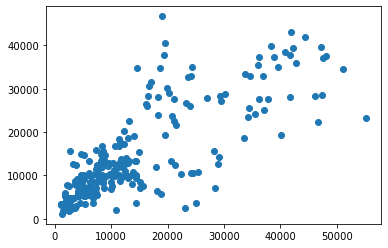

In [151]:
#LGBM2
plt.scatter(y_test, y_pred)

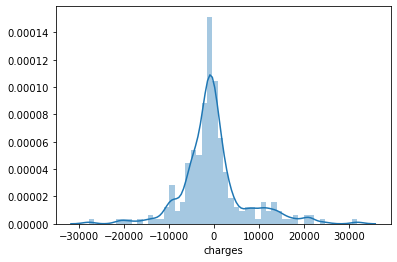

In [153]:
#LGBM2
sns.distplot((y_test - y_pred),bins = 50)

In [154]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()

DummyRegressor()

In [155]:
# make predictions
y_pred = dummy_regr.predict(X_test)
# evaluate predictions
dummy_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % dummy_evs)
dummy_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % dummy_max_error)
dummy_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % dummy_mae)
dummy_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % dummy_mse)
dummy_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % dummy_msle)
dummy_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % dummy_meae)
dummy_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % dummy_r2)
dummy_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % dummy_mpd)
dummy_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % dummy_mgd)
dummy_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % dummy_mape)

EVS: 0.000
MAX ERROR: 41911.360
MAE: 9184.453
MSE: 146438302.254
MSLE: 0.988
MEAE: 7886.452
R2: -0.000
MPD: 9421.953
MGD: 0.787
MAPE: 1.492


In [156]:
models = pd.DataFrame({
    'Model' : ['Dummy','Linear Regression', 'Decision Tree', 'Random Forest',
               'SGDR', 'LGBM', 'LGBM2' ],
    'MAE' : [dummy_mae, lr_mae, dt_mae, rf_mae, sgd_mae, lgb_mae, lgb2_mae],
    'MSE' : [dummy_mse, lr_mse, dt_mse, rf_mse, sgd_mse, lgb_mse, lgb2_mse],
    'R2' : [dummy_r2, lr_r2, dt_r2, rf_r2, sgd_r2, lgb_r2, lgb2_r2],
    'MAPE' : [dummy_mape, lr_mape, dt_mape, rf_mape, sgd_mape, lgb_mape, lgb2_mape],
})

models.sort_values(by='MAE', ascending=True)

Model          MAE           MSE        R2      MAPE
3      Random Forest  4588.221713  5.351937e+07  0.634377  0.467890
6              LGBM2  4785.680565  5.247754e+07  0.641494  0.481160
5               LGBM  4790.392063  5.248469e+07  0.641446  0.484917
1  Linear Regression  5074.131368  5.216018e+07  0.643662  0.553437
4               SGDR  5110.522533  5.142533e+07  0.648683  0.573173
2      Decision Tree  5593.488732  9.039228e+07  0.382476  0.535888
0              Dummy  9184.453495  1.464383e+08 -0.000408  1.491910

In [157]:
y_pred.min()

13224.041638539547

In [158]:
y_train.min()

1121.8739

# Hyperparameter Tuning

In [159]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([('regressor', DummyRegressor())])

search_space = [{'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__max_depth': [None, 5, 10, 15]},
                {'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [10, 50, 100, 500, 1000],
                 'regressor__max_depth': [None, 5, 10, 15]},
                {'regressor': [SGDRegressor(random_state=0)],
                 'regressor__max_iter': [None, 1000, 1500, 2000]},
               {'regressor': [LGBMRegressor(random_state=0)],
                 'regressor__num_leaves': [5, 10, 15],
                 'regressor__n_estimators': [10, 50, 100, 500, 1000]}]

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring='neg_mean_absolute_error')
best_model = gs.fit(X_train, y_train)

best_model.best_estimator_.get_params()['regressor']

C:\Users\ander\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ander\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ander\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ander\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1537, in fit
    return self._fit(
  File "C:\Users\and

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=0)

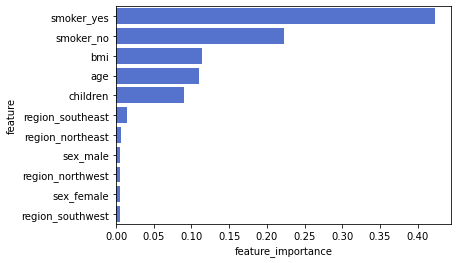

In [160]:
df_feat = pd.DataFrame({'feature': X_test.columns,
                        'feature_importance': best_model.best_estimator_.named_steps["regressor"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns_feats = sns.barplot(x='feature_importance', y='feature', data=df_feat, orient='h', color='royalblue')

# Deep Learning

In [161]:
#pip install tensorflow

In [162]:
import tensorflow.compat.v1.keras.backend as K #to solve a current problem with SHAP libray
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #to solve a current problem with SHAP libray

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [163]:
import tensorflow as tf
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Add an input layer 
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one EXTRA hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [164]:
# Check model output shape
model.output_shape

(None, 1)

In [165]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 96        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 453
Trainable params: 453
Non-trainable pa

In [166]:
# Check model config
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 11,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initial

In [167]:
# List all weight tensors 
model.get_weights()

[array([[-0.10660675, -0.47909907,  0.25494188, -0.49624   ,  0.36556333,
         -0.4884215 ,  0.46499646,  0.38750237, -0.08588627,  0.3310035 ,
         -0.00064534],
        [-0.11253989, -0.07480887, -0.4030208 , -0.25084713, -0.40502954,
          0.04688603,  0.06179768,  0.50345665, -0.25530136,  0.32067525,
         -0.28513235],
        [-0.35839206,  0.03303462, -0.13349855, -0.0835115 , -0.31062764,
          0.20370191,  0.06896502, -0.4674199 , -0.07484323, -0.11679265,
          0.06776619],
        [-0.06937885,  0.16614032, -0.20903891, -0.50363326,  0.22927314,
          0.05380177,  0.39075768,  0.0465517 , -0.51706564,  0.35626143,
         -0.46732962],
        [-0.35876396,  0.29981655,  0.25780237, -0.35076955,  0.2231586 ,
          0.4746772 ,  0.00711888,  0.4986921 , -0.25270048, -0.01419514,
          0.14655465],
        [-0.30340928,  0.40226018,  0.03921384, -0.10164514, -0.21670124,
          0.5091978 , -0.22121361, -0.13475186,  0.39570683,  0.1709097

In [170]:
tf.keras.losses.MeanSquaredError(
    reduction="auto", name="mean_squared_error")

In [171]:
# Config the model with the loss, optimizer and metric
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['MeanSquaredError'])

In [172]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1)

Train on 1062 samples
Epoch 1/10
1062/1062 [==============================] - 1s 780us/sample - loss: 320917037.4812 - MeanSquaredError: 320917024.0000
Epoch 2/10
1062/1062 [==============================] - 0s 134us/sample - loss: 259509878.7420 - MeanSquaredError: 259509872.0000
Epoch 3/10
1062/1062 [==============================] - 0s 126us/sample - loss: 145090737.6994 - MeanSquaredError: 145090768.0000
Epoch 4/10
1062/1062 [==============================] - 0s 131us/sample - loss: 126755155.8192 - MeanSquaredError: 126755144.0000
Epoch 5/10
1062/1062 [==============================] - 0s 128us/sample - loss: 106363204.6332 - MeanSquaredError: 106363216.0000
Epoch 6/10
1062/1062 [==============================] - 0s 124us/sample - loss: 84633825.2232 - MeanSquaredError: 84633808.0000
Epoch 7/10
1062/1062 [==============================] - 0s 129us/sample - loss: 66382479.4288 - MeanSquaredError: 66382476.0000
Epoch 8/10
1062/1062 [==============================] - 0s 135us/sample 

Text(0, 0.5, 'Validation Loss')

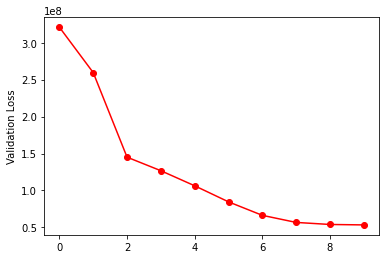

In [173]:
ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.set_ylabel('Validation Loss')

In [174]:
#pip install shap

In [175]:
# Feature importance
#import shap

#explainer = shap.DeepExplainer(model, X_train)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Evaluate Deep Learning Model

In [176]:
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
dl_evs = explained_variance_score(y_test, y_pred)
print('EVS: %.3f' % dl_evs)
dl_max_error = max_error(y_test, y_pred)
print('MAX ERROR: %.3f' % dl_max_error)
dl_mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % dl_mae)
dl_mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % dl_mse)
dl_msle = mean_squared_log_error(y_test, y_pred)
print('MSLE: %.3f' % dl_msle)
dl_meae = median_absolute_error(y_test, y_pred)
print('MEAE: %.3f' % dl_meae)
dl_r2 = r2_score(y_test, y_pred)
print('R2: %.3f' % dl_r2)
dl_mpd = mean_poisson_deviance(y_test, y_pred)
print('MPD: %.3f' % dl_mpd)
dl_mgd = mean_gamma_deviance(y_test, y_pred)
print('MGD: %.3f' % dl_mgd)
dl_mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % dl_mape)

EVS: 0.641
MAX ERROR: 23686.650
MAE: 5562.772
MSE: 52733667.627
MSLE: 0.466
MEAE: 4124.819
R2: 0.640
MPD: 3551.324
MGD: 0.386
MAPE: 0.799


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Monitoring Overfitting

In [177]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one EXTRA hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [178]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['MeanSquaredError'])

In [179]:
history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

Train on 1062 samples, validate on 266 samples
Epoch 1/10
1062/1062 [==============================] - 0s 238us/sample - loss: 321176995.6215 - MeanSquaredError: 321176992.0000 - val_loss: 324524819.4192 - val_MeanSquaredError: 324524832.0000
Epoch 2/10
 745/1062 [====================>.........] - ETA: 0s - loss: 306315367.0000 - MeanSquaredError: 306315424.0000

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1062/1062 [==============================] - 0s 156us/sample - loss: 274590340.8477 - MeanSquaredError: 274590368.0000 - val_loss: 187028069.7477 - val_MeanSquaredError: 187028064.0000
Epoch 3/10
1062/1062 [==============================] - 0s 144us/sample - loss: 146504154.1156 - MeanSquaredError: 146504112.0000 - val_loss: 132168658.4925 - val_MeanSquaredError: 132168648.0000
Epoch 4/10
1062/1062 [==============================] - 0s 168us/sample - loss: 126655711.9068 - MeanSquaredError: 126655696.0000 - val_loss: 118883590.3318 - val_MeanSquaredError: 118883624.0000
Epoch 5/10
1062/1062 [==============================] - 0s 150us/sample - loss: 114380045.0050 - MeanSquaredError: 114380008.0000 - val_loss: 106390354.3571 - val_MeanSquaredError: 106390352.0000
Epoch 6/10
1062/1062 [==============================] - 0s 151us/sample - loss: 102132878.8550 - MeanSquaredError: 102132880.0000 - val_loss: 93997488.4671 - val_MeanSquaredError: 93997472.0000
Epoch 7/10
1062/1062 [===========

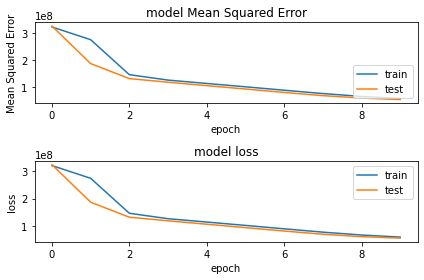

In [180]:
# Plot the accuracy in the train and validation/test dataset
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['MeanSquaredError'])
plt.plot(history.history['val_MeanSquaredError'])
plt.title('model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [182]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#create a function that returns the model for use in the KerasClassifier wrapper
def create_model():

    # Initialize the constructor
    model_gs = Sequential()

    # Add an input layer 
    model_gs.add(Dense(11, activation='relu', input_shape=(11,)))

    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
    
    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
        
    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
    
    # Add one EXTRA hidden layer 
    model_gs.add(Dense(8, activation='relu'))

    # Add an output layer 
    model_gs.add(Dense(1, activation='relu'))
    
    # Compile model
    model_gs.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])
    
    return model_gs

model_keras = KerasClassifier(build_fn=create_model, verbose=1)

batch_size = [8, 32]
epochs = [3, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_keras, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-182-62813eb77bf1>:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model_keras = KerasClassifier(build_fn=create_model, verbose=1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 274us/sample - loss: 239010.3586 - MeanSquaredError: 239010.4062
Epoch 2/3
849/849 [==============================] - 0s 183us/sample - loss: 221364.3316 - MeanSquaredError: 221364.3281
Epoch 3/3
849/849 [==============================] - 0s 184us/sample - loss: 104798.1768 - MeanSquaredError: 104798.1797


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 303us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6562
Epoch 2/3
849/849 [==============================] - 0s 189us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6875
Epoch 3/3
849/849 [==============================] - 0s 159us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6406


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 292us/sample - loss: 239510.3968 - MeanSquaredError: 239510.4062
Epoch 2/3
850/850 [==============================] - 0s 154us/sample - loss: 214029.1669 - MeanSquaredError: 214029.2188
Epoch 3/3
850/850 [==============================] - 0s 148us/sample - loss: 89379.2236 - MeanSquaredError: 89379.2109


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 354us/sample - loss: 239662.7626 - MeanSquaredError: 239662.8281
Epoch 2/3
850/850 [==============================] - 0s 226us/sample - loss: 213170.3082 - MeanSquaredError: 213170.2812
Epoch 3/3
850/850 [==============================] - 0s 204us/sample - loss: 82440.0813 - MeanSquaredError: 82440.0859


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 280us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 2/3
850/850 [==============================] - 0s 156us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 3/3
850/850 [==============================] - 0s 164us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5312


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 290us/sample - loss: 237709.7260 - MeanSquaredError: 237709.7031
Epoch 2/10
849/849 [==============================] - 0s 164us/sample - loss: 173231.6429 - MeanSquaredError: 173231.7031
Epoch 3/10
849/849 [==============================] - 0s 158us/sample - loss: 55613.9392 - MeanSquaredError: 55613.9492
Epoch 4/10
849/849 [==============================] - 0s 162us/sample - loss: 46263.8854 - MeanSquaredError: 46263.8828
Epoch 5/10
849/849 [==============================] - 0s 165us/sample - loss: 38496.1934 - MeanSquaredError: 38496.1875
Epoch 6/10
849/849 [==============================] - 0s 158us/sample - loss: 32633.0971 - MeanSquaredError: 32633.0996
Epoch 7/10
849/849 [==============================] - 0s 169us/sample - loss: 29270.5877 - MeanSquaredError: 29270.5918
Epoch 8/10
849/849 [==============================] - 0s 168us/sample - loss: 27794.1392 - MeanSquaredError: 27794.1406
Epoch 9/10
849/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 302us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6562
Epoch 2/10
849/849 [==============================] - 0s 166us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6875
Epoch 3/10
849/849 [==============================] - 0s 166us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6406
Epoch 4/10
849/849 [==============================] - 0s 160us/sample - loss: 239842.6667 - MeanSquaredError: 239842.7500
Epoch 5/10
849/849 [==============================] - 0s 171us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6562
Epoch 6/10
849/849 [==============================] - 0s 157us/sample - loss: 239842.6667 - MeanSquaredError: 239842.5938
Epoch 7/10
849/849 [==============================] - 0s 173us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6719
Epoch 8/10
849/849 [==============================] - 0s 158us/sample - loss: 239842.6667 - MeanSquaredError: 239842.7188
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 307us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 2/10
850/850 [==============================] - 0s 171us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4375
Epoch 3/10
850/850 [==============================] - 0s 166us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844
Epoch 4/10
850/850 [==============================] - 0s 164us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4375
Epoch 5/10
850/850 [==============================] - 0s 175us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 6/10
850/850 [==============================] - 0s 171us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4375
Epoch 7/10
850/850 [==============================] - 0s 233us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 8/10
850/850 [==============================] - 0s 180us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5625
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 357us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 2/10
850/850 [==============================] - 0s 167us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 3/10
850/850 [==============================] - 0s 169us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 4/10
850/850 [==============================] - 0s 166us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5625
Epoch 5/10
850/850 [==============================] - 0s 165us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5312
Epoch 6/10
850/850 [==============================] - 0s 167us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 7/10
850/850 [==============================] - 0s 169us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5312
Epoch 8/10
850/850 [==============================] - 0s 172us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 300us/sample - loss: 237931.8650 - MeanSquaredError: 237931.8438
Epoch 2/10
850/850 [==============================] - 0s 172us/sample - loss: 161388.0919 - MeanSquaredError: 161388.1094
Epoch 3/10
850/850 [==============================] - 0s 173us/sample - loss: 59814.2182 - MeanSquaredError: 59814.2305
Epoch 4/10
850/850 [==============================] - 0s 172us/sample - loss: 52564.4493 - MeanSquaredError: 52564.4609
Epoch 5/10
850/850 [==============================] - 0s 171us/sample - loss: 46447.6643 - MeanSquaredError: 46447.6719
Epoch 6/10
850/850 [==============================] - 0s 197us/sample - loss: 41630.7381 - MeanSquaredError: 41630.7500
Epoch 7/10
850/850 [==============================] - 0s 236us/sample - loss: 37747.9314 - MeanSquaredError: 37747.9375
Epoch 8/10
850/850 [==============================] - 0s 276us/sample - loss: 35198.8555 - MeanSquaredError: 35198.8594
Epoch 9/10
850/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 201us/sample - loss: 239661.5820 - MeanSquaredError: 239661.5938
Epoch 2/3
849/849 [==============================] - 0s 54us/sample - loss: 239264.0911 - MeanSquaredError: 239264.0781
Epoch 3/3
849/849 [==============================] - 0s 51us/sample - loss: 238228.2409 - MeanSquaredError: 238228.2344


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 204us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6719
Epoch 2/3
849/849 [==============================] - 0s 49us/sample - loss: 239842.6668 - MeanSquaredError: 239842.6719
Epoch 3/3
849/849 [==============================] - 0s 49us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6562


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 215us/sample - loss: 240376.8636 - MeanSquaredError: 240376.8438
Epoch 2/3
850/850 [==============================] - 0s 57us/sample - loss: 240153.2717 - MeanSquaredError: 240153.2656
Epoch 3/3
850/850 [==============================] - 0s 52us/sample - loss: 239620.3334 - MeanSquaredError: 239620.3125


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 204us/sample - loss: 240371.8552 - MeanSquaredError: 240371.8594
Epoch 2/3
850/850 [==============================] - 0s 53us/sample - loss: 240158.3244 - MeanSquaredError: 240158.3281
Epoch 3/3
850/850 [==============================] - 0s 50us/sample - loss: 239578.4501 - MeanSquaredError: 239578.4531


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 218us/sample - loss: 240359.0946 - MeanSquaredError: 240359.1094
Epoch 2/3
850/850 [==============================] - 0s 57us/sample - loss: 240115.5372 - MeanSquaredError: 240115.5781
Epoch 3/3
850/850 [==============================] - 0s 50us/sample - loss: 239196.3427 - MeanSquaredError: 239196.3281


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 222us/sample - loss: 239738.9587 - MeanSquaredError: 239738.9531
Epoch 2/10
849/849 [==============================] - 0s 65us/sample - loss: 239319.2404 - MeanSquaredError: 239319.2344
Epoch 3/10
849/849 [==============================] - 0s 64us/sample - loss: 238124.3146 - MeanSquaredError: 238124.3125
Epoch 4/10
849/849 [==============================] - 0s 63us/sample - loss: 234307.2628 - MeanSquaredError: 234307.2656
Epoch 5/10
849/849 [==============================] - 0s 64us/sample - loss: 223854.2582 - MeanSquaredError: 223854.2500
Epoch 6/10
849/849 [==============================] - 0s 59us/sample - loss: 199600.8180 - MeanSquaredError: 199600.8281
Epoch 7/10
849/849 [==============================] - 0s 66us/sample - loss: 153690.3948 - MeanSquaredError: 153690.3906
Epoch 8/10
849/849 [==============================] - 0s 60us/sample - loss: 94270.5724 - MeanSquaredError: 94270.5859
Epoch 9/10
8

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 250us/sample - loss: 239753.6998 - MeanSquaredError: 239753.6875
Epoch 2/10
849/849 [==============================] - 0s 81us/sample - loss: 239340.2334 - MeanSquaredError: 239340.2344
Epoch 3/10
849/849 [==============================] - 0s 69us/sample - loss: 238247.7678 - MeanSquaredError: 238247.7500
Epoch 4/10
849/849 [==============================] - 0s 70us/sample - loss: 235787.4333 - MeanSquaredError: 235787.4062
Epoch 5/10
849/849 [==============================] - 0s 72us/sample - loss: 230402.3269 - MeanSquaredError: 230402.3125
Epoch 6/10
849/849 [==============================] - 0s 70us/sample - loss: 218884.4304 - MeanSquaredError: 218884.4531
Epoch 7/10
849/849 [==============================] - 0s 72us/sample - loss: 196480.3335 - MeanSquaredError: 196480.3594
Epoch 8/10
849/849 [==============================] - 0s 74us/sample - loss: 158122.0330 - MeanSquaredError: 158122.0312
Epoch 9/10

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 261us/sample - loss: 240186.7983 - MeanSquaredError: 240186.7656
Epoch 2/10
850/850 [==============================] - 0s 73us/sample - loss: 239557.7781 - MeanSquaredError: 239557.7969
Epoch 3/10
850/850 [==============================] - 0s 74us/sample - loss: 237912.6271 - MeanSquaredError: 237912.6094
Epoch 4/10
850/850 [==============================] - 0s 69us/sample - loss: 233415.3146 - MeanSquaredError: 233415.2812
Epoch 5/10
850/850 [==============================] - 0s 56us/sample - loss: 221733.5607 - MeanSquaredError: 221733.5469
Epoch 6/10
850/850 [==============================] - 0s 53us/sample - loss: 195066.6729 - MeanSquaredError: 195066.6562
Epoch 7/10
850/850 [==============================] - 0s 53us/sample - loss: 145994.5028 - MeanSquaredError: 145994.4844
Epoch 8/10
850/850 [==============================] - 0s 55us/sample - loss: 87067.4587 - MeanSquaredError: 87067.4609
Epoch 9/10
8

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 210us/sample - loss: 240363.2396 - MeanSquaredError: 240363.2188
Epoch 2/10
850/850 [==============================] - 0s 59us/sample - loss: 240185.6431 - MeanSquaredError: 240185.6562
Epoch 3/10
850/850 [==============================] - 0s 54us/sample - loss: 239677.3836 - MeanSquaredError: 239677.4219
Epoch 4/10
850/850 [==============================] - 0s 52us/sample - loss: 238038.5057 - MeanSquaredError: 238038.5000
Epoch 5/10
850/850 [==============================] - 0s 54us/sample - loss: 233489.0004 - MeanSquaredError: 233489.0000
Epoch 6/10
850/850 [==============================] - 0s 61us/sample - loss: 221941.7589 - MeanSquaredError: 221941.7188
Epoch 7/10
850/850 [==============================] - 0s 53us/sample - loss: 195842.7579 - MeanSquaredError: 195842.7500
Epoch 8/10
850/850 [==============================] - 0s 58us/sample - loss: 149877.1956 - MeanSquaredError: 149877.1875
Epoch 9/10

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 241us/sample - loss: 240252.3062 - MeanSquaredError: 240252.2969
Epoch 2/10
850/850 [==============================] - 0s 57us/sample - loss: 239845.5754 - MeanSquaredError: 239845.5938
Epoch 3/10
850/850 [==============================] - 0s 55us/sample - loss: 238541.8764 - MeanSquaredError: 238541.8594
Epoch 4/10
850/850 [==============================] - 0s 55us/sample - loss: 234949.7478 - MeanSquaredError: 234949.7344
Epoch 5/10
850/850 [==============================] - 0s 56us/sample - loss: 225546.5324 - MeanSquaredError: 225546.5625
Epoch 6/10
850/850 [==============================] - 0s 55us/sample - loss: 202637.2931 - MeanSquaredError: 202637.2969
Epoch 7/10
850/850 [==============================] - 0s 55us/sample - loss: 157442.0144 - MeanSquaredError: 157442.0000
Epoch 8/10
850/850 [==============================] - 0s 56us/sample - loss: 97574.5531 - MeanSquaredError: 97574.5469
Epoch 9/10
8

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 1062 samples
Epoch 1/10
1062/1062 [==============================] - 0s 207us/sample - loss: 375135.8266 - MeanSquaredError: 375135.8125
Epoch 2/10
1062/1062 [==============================] - 0s 61us/sample - loss: 373896.7648 - MeanSquaredError: 373896.7812
Epoch 3/10
1062/1062 [==============================] - 0s 60us/sample - loss: 369174.5636 - MeanSquaredError: 369174.5938
Epoch 4/10
1062/1062 [==============================] - 0s 62us/sample - loss: 353340.9118 - MeanSquaredError: 353340.8750
Epoch 5/10
1062/1062 [==============================] - 0s 61us/sample - loss: 305881.7551 - MeanSquaredError: 305881.6875
Epoch 6/10
1062/1062 [==============================] - 0s 58us/sample - loss: 207802.4006 - MeanSquaredError: 207802.3750
Epoch 7/10
1062/1062 [==============================] - 0s 62us/sample - loss: 104647.0186 - MeanSquaredError: 104647.0234
Epoch 8/10
1062/1062 [==============================] - 0s 64us/sample - loss: 80232.0021 - MeanSquaredError: 80231.

In [184]:
# Using optmizer 'adam'
def create_model(optimizer='adam'):

    # Initialize the constructor
    model_gs = Sequential()

    # Add an input layer 
    model_gs.add(Dense(11, activation='relu', input_shape=(11,)))

    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
    
    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
    
    # Add one hidden layer 
    model_gs.add(Dense(8, activation='relu'))
    
    # Add one EXTRA hidden layer 
    model_gs.add(Dense(8, activation='relu'))

    # Add an output layer 
    model_gs.add(Dense(1, activation='relu'))
    
    # Compile model
    model_gs.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['MeanSquaredError'])
    
    return model_gs

model_keras = KerasClassifier(build_fn=create_model, verbose=1)

batch_size = [8, 32]
epochs = [3, 10]
optimizer=['adam','rmsprop']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

grid = GridSearchCV(estimator=model_keras, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-184-5be8a0476690>:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model_keras = KerasClassifier(build_fn=create_model, verbose=1)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Train on 849 samples
Epoch 1/3
849/849 [==============================] - 1s 635us/sample - loss: 238736.8659 - MeanSquaredError: 238736.8594
Epoch 2/3
849/849 [==============================] - 0s 340us/sample - loss: 195613.5217 - MeanSquaredError: 195613.5000
Epoch 3/3
849/849 [==============================] - 0s 382us/sample - loss: 65488.9772 - MeanSquaredError: 65488.9766


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 1s 620us/sample - loss: 239144.6151 - MeanSquaredError: 239144.5938
Epoch 2/3
849/849 [==============================] - 0s 339us/sample - loss: 209105.8839 - MeanSquaredError: 209105.9062
Epoch 3/3
849/849 [==============================] - 0s 343us/sample - loss: 76658.6169 - MeanSquaredError: 76658.6328


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 631us/sample - loss: 239066.8592 - MeanSquaredError: 239066.9062
Epoch 2/3
850/850 [==============================] - 0s 331us/sample - loss: 177647.2370 - MeanSquaredError: 177647.2344
Epoch 3/3
850/850 [==============================] - 0s 329us/sample - loss: 57484.0338 - MeanSquaredError: 57484.0469


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 644us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5312
Epoch 2/3
850/850 [==============================] - 0s 349us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844
Epoch 3/3
850/850 [==============================] - 0s 338us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 640us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 2/3
850/850 [==============================] - 0s 349us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4531
Epoch 3/3
850/850 [==============================] - 0s 353us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 1s 713us/sample - loss: 239415.2684 - MeanSquaredError: 239415.3281
Epoch 2/3
849/849 [==============================] - 0s 347us/sample - loss: 235124.3836 - MeanSquaredError: 235124.3750
Epoch 3/3
849/849 [==============================] - 0s 349us/sample - loss: 214796.9324 - MeanSquaredError: 214796.9219


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 1s 635us/sample - loss: 238988.8126 - MeanSquaredError: 238988.7656
Epoch 2/3
849/849 [==============================] - 0s 384us/sample - loss: 232763.7456 - MeanSquaredError: 232763.7188
Epoch 3/3
849/849 [==============================] - 0s 410us/sample - loss: 210120.2390 - MeanSquaredError: 210120.2031


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 691us/sample - loss: 238013.4765 - MeanSquaredError: 238013.5000
Epoch 2/3
850/850 [==============================] - 0s 355us/sample - loss: 208206.0271 - MeanSquaredError: 208206.0312
Epoch 3/3
850/850 [==============================] - 0s 375us/sample - loss: 102173.1848 - MeanSquaredError: 102173.1875


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 757us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5625
Epoch 2/3
850/850 [==============================] - 0s 348us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 3/3
850/850 [==============================] - 0s 382us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 1s 720us/sample - loss: 239828.3349 - MeanSquaredError: 239828.2969
Epoch 2/3
850/850 [==============================] - 0s 465us/sample - loss: 233271.0717 - MeanSquaredError: 233271.0625
Epoch 3/3
850/850 [==============================] - 0s 416us/sample - loss: 198583.0800 - MeanSquaredError: 198583.0781


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 1s 686us/sample - loss: 239654.3949 - MeanSquaredError: 239654.3750
Epoch 2/10
849/849 [==============================] - 0s 471us/sample - loss: 231203.0393 - MeanSquaredError: 231203.0312
Epoch 3/10
849/849 [==============================] - 0s 449us/sample - loss: 128429.4035 - MeanSquaredError: 128429.3594
Epoch 4/10
849/849 [==============================] - 0s 409us/sample - loss: 59883.7586 - MeanSquaredError: 59883.7695
Epoch 5/10
849/849 [==============================] - 0s 338us/sample - loss: 54566.7333 - MeanSquaredError: 54566.7266
Epoch 6/10
849/849 [==============================] - 0s 398us/sample - loss: 50625.1425 - MeanSquaredError: 50625.1406
Epoch 7/10
849/849 [==============================] - 0s 338us/sample - loss: 46573.4532 - MeanSquaredError: 46573.4492
Epoch 8/10
849/849 [==============================] - 0s 443us/sample - loss: 43287.2850 - MeanSquaredError: 43287.2891
Epoch 9/10
84

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 1s 653us/sample - loss: 239035.6462 - MeanSquaredError: 239035.6406
Epoch 2/10
849/849 [==============================] - 0s 341us/sample - loss: 203541.0792 - MeanSquaredError: 203541.1406
Epoch 3/10
849/849 [==============================] - 0s 343us/sample - loss: 74225.9792 - MeanSquaredError: 74225.9688
Epoch 4/10
849/849 [==============================] - 0s 339us/sample - loss: 57187.6901 - MeanSquaredError: 57187.6953
Epoch 5/10
849/849 [==============================] - 0s 330us/sample - loss: 52280.6569 - MeanSquaredError: 52280.6680
Epoch 6/10
849/849 [==============================] - 0s 337us/sample - loss: 47778.8414 - MeanSquaredError: 47778.8359
Epoch 7/10
849/849 [==============================] - 0s 341us/sample - loss: 44134.6819 - MeanSquaredError: 44134.6797
Epoch 8/10
849/849 [==============================] - 0s 329us/sample - loss: 40624.4820 - MeanSquaredError: 40624.4805
Epoch 9/10
849/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 662us/sample - loss: 238621.6973 - MeanSquaredError: 238621.7031
Epoch 2/10
850/850 [==============================] - 0s 334us/sample - loss: 181438.6727 - MeanSquaredError: 181438.7031
Epoch 3/10
850/850 [==============================] - 0s 333us/sample - loss: 64945.2479 - MeanSquaredError: 64945.2383
Epoch 4/10
850/850 [==============================] - 0s 341us/sample - loss: 51972.0668 - MeanSquaredError: 51972.0625
Epoch 5/10
850/850 [==============================] - 0s 350us/sample - loss: 44107.8225 - MeanSquaredError: 44107.8125
Epoch 6/10
850/850 [==============================] - 0s 340us/sample - loss: 38232.5112 - MeanSquaredError: 38232.5039
Epoch 7/10
850/850 [==============================] - 0s 332us/sample - loss: 34826.2359 - MeanSquaredError: 34826.2383
Epoch 8/10
850/850 [==============================] - 0s 364us/sample - loss: 32980.5569 - MeanSquaredError: 32980.5586
Epoch 9/10
850/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 898us/sample - loss: 237867.7340 - MeanSquaredError: 237867.7031
Epoch 2/10
850/850 [==============================] - 0s 560us/sample - loss: 174420.2451 - MeanSquaredError: 174420.2344
Epoch 3/10
850/850 [==============================] - 0s 459us/sample - loss: 62931.6789 - MeanSquaredError: 62931.6836
Epoch 4/10
850/850 [==============================] - 0s 446us/sample - loss: 49847.4099 - MeanSquaredError: 49847.4219
Epoch 5/10
850/850 [==============================] - 0s 403us/sample - loss: 40906.4578 - MeanSquaredError: 40906.4648
Epoch 6/10
850/850 [==============================] - 0s 425us/sample - loss: 35215.5339 - MeanSquaredError: 35215.5352
Epoch 7/10
850/850 [==============================] - 0s 447us/sample - loss: 31525.2334 - MeanSquaredError: 31525.2344
Epoch 8/10
850/850 [==============================] - 0s 466us/sample - loss: 29820.1792 - MeanSquaredError: 29820.1797
Epoch 9/10
850/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 728us/sample - loss: 238931.1464 - MeanSquaredError: 238931.1562
Epoch 2/10
850/850 [==============================] - 0s 343us/sample - loss: 194719.6792 - MeanSquaredError: 194719.7031
Epoch 3/10
850/850 [==============================] - 0s 403us/sample - loss: 66095.8156 - MeanSquaredError: 66095.7969
Epoch 4/10
850/850 [==============================] - 0s 552us/sample - loss: 52843.1515 - MeanSquaredError: 52843.1445
Epoch 5/10
850/850 [==============================] - 0s 501us/sample - loss: 44659.5549 - MeanSquaredError: 44659.5547
Epoch 6/10
850/850 [==============================] - 0s 374us/sample - loss: 36771.7390 - MeanSquaredError: 36771.7422
Epoch 7/10
850/850 [==============================] - 0s 388us/sample - loss: 31933.9581 - MeanSquaredError: 31933.9629
Epoch 8/10
850/850 [==============================] - 0s 479us/sample - loss: 29443.9426 - MeanSquaredError: 29443.9512
Epoch 9/10
850/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 1s 1ms/sample - loss: 238761.2320 - MeanSquaredError: 238761.2500
Epoch 2/10
849/849 [==============================] - 0s 491us/sample - loss: 227265.9172 - MeanSquaredError: 227265.9844
Epoch 3/10
849/849 [==============================] - 0s 394us/sample - loss: 169420.7094 - MeanSquaredError: 169420.6875
Epoch 4/10
849/849 [==============================] - ETA: 0s - loss: 78140.2539 - MeanSquaredError: 78140.26 - 0s 339us/sample - loss: 77482.2372 - MeanSquaredError: 77482.2500
Epoch 5/10
849/849 [==============================] - 0s 359us/sample - loss: 59938.8615 - MeanSquaredError: 59938.8711
Epoch 6/10
849/849 [==============================] - 0s 381us/sample - loss: 54946.1469 - MeanSquaredError: 54946.1406
Epoch 7/10
849/849 [==============================] - 0s 380us/sample - loss: 50289.7701 - MeanSquaredError: 50289.7734
Epoch 8/10
849/849 [==============================] - 0s 345us/sample - loss:

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 1s 835us/sample - loss: 238518.8615 - MeanSquaredError: 238518.8594
Epoch 2/10
849/849 [==============================] - 1s 634us/sample - loss: 226298.8914 - MeanSquaredError: 226298.8906
Epoch 3/10
849/849 [==============================] - 0s 550us/sample - loss: 174955.7580 - MeanSquaredError: 174955.7656
Epoch 4/10
849/849 [==============================] - 0s 408us/sample - loss: 88106.4453 - MeanSquaredError: 88106.4219
Epoch 5/10
849/849 [==============================] - 0s 364us/sample - loss: 60564.3503 - MeanSquaredError: 60564.3398
Epoch 6/10
849/849 [==============================] - 0s 342us/sample - loss: 55985.2846 - MeanSquaredError: 55985.2812
Epoch 7/10
849/849 [==============================] - 0s 568us/sample - loss: 51916.0398 - MeanSquaredError: 51916.0391
Epoch 8/10
849/849 [==============================] - 0s 530us/sample - loss: 47688.2842 - MeanSquaredError: 47688.2930
Epoch 9/10
84

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 735us/sample - loss: 237666.2603 - MeanSquaredError: 237666.3125
Epoch 2/10
850/850 [==============================] - 0s 315us/sample - loss: 212577.7840 - MeanSquaredError: 212577.7812
Epoch 3/10
850/850 [==============================] - 0s 328us/sample - loss: 125594.4076 - MeanSquaredError: 125594.3984
Epoch 4/10
850/850 [==============================] - 0s 328us/sample - loss: 60799.4302 - MeanSquaredError: 60799.4258
Epoch 5/10
850/850 [==============================] - 0s 404us/sample - loss: 54088.4120 - MeanSquaredError: 54088.3945
Epoch 6/10
850/850 [==============================] - 0s 422us/sample - loss: 49079.2779 - MeanSquaredError: 49079.2852
Epoch 7/10
850/850 [==============================] - 0s 334us/sample - loss: 44275.9045 - MeanSquaredError: 44275.9141
Epoch 8/10
850/850 [==============================] - 0s 359us/sample - loss: 40175.5065 - MeanSquaredError: 40175.5156
Epoch 9/10
85

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 891us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844
Epoch 2/10
850/850 [==============================] - 0s 423us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 3/10
850/850 [==============================] - 0s 407us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5156
Epoch 4/10
850/850 [==============================] - 0s 448us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844
Epoch 5/10
850/850 [==============================] - 0s 440us/sample - loss: 240408.5000 - MeanSquaredError: 240408.5625
Epoch 6/10
850/850 [==============================] - 0s 400us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 7/10
850/850 [==============================] - 0s 355us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4688
Epoch 8/10
850/850 [==============================] - 0s 489us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4375
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 1ms/sample - loss: 237702.6760 - MeanSquaredError: 237702.6562
Epoch 2/10
850/850 [==============================] - 0s 556us/sample - loss: 216200.9260 - MeanSquaredError: 216200.9062
Epoch 3/10
850/850 [==============================] - 0s 453us/sample - loss: 137587.9376 - MeanSquaredError: 137587.9688
Epoch 4/10
850/850 [==============================] - 0s 418us/sample - loss: 65743.2152 - MeanSquaredError: 65743.2188
Epoch 5/10
850/850 [==============================] - 0s 514us/sample - loss: 55789.0810 - MeanSquaredError: 55789.0820
Epoch 6/10
850/850 [==============================] - 0s 452us/sample - loss: 50528.6687 - MeanSquaredError: 50528.6758
Epoch 7/10
850/850 [==============================] - 0s 424us/sample - loss: 45296.8946 - MeanSquaredError: 45296.8906
Epoch 8/10
850/850 [==============================] - 0s 390us/sample - loss: 40258.8932 - MeanSquaredError: 40258.8906
Epoch 9/10
850/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 506us/sample - loss: 239725.5529 - MeanSquaredError: 239725.5469
Epoch 2/3
849/849 [==============================] - 0s 90us/sample - loss: 239399.4010 - MeanSquaredError: 239399.3906
Epoch 3/3
849/849 [==============================] - 0s 91us/sample - loss: 238609.6349 - MeanSquaredError: 238609.6406


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 464us/sample - loss: 239668.5120 - MeanSquaredError: 239668.4844
Epoch 2/3
849/849 [==============================] - 0s 113us/sample - loss: 239394.6232 - MeanSquaredError: 239394.5938
Epoch 3/3
849/849 [==============================] - 0s 101us/sample - loss: 238781.4086 - MeanSquaredError: 238781.4219


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 488us/sample - loss: 240161.5197 - MeanSquaredError: 240161.5312
Epoch 2/3
850/850 [==============================] - 0s 93us/sample - loss: 239562.3920 - MeanSquaredError: 239562.3906
Epoch 3/3
850/850 [==============================] - 0s 96us/sample - loss: 238037.3519 - MeanSquaredError: 238037.3438


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 459us/sample - loss: 240347.7819 - MeanSquaredError: 240347.7969
Epoch 2/3
850/850 [==============================] - 0s 91us/sample - loss: 240077.8481 - MeanSquaredError: 240077.8281
Epoch 3/3
850/850 [==============================] - 0s 92us/sample - loss: 239342.9099 - MeanSquaredError: 239342.8906


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 483us/sample - loss: 240326.8785 - MeanSquaredError: 240326.8594
Epoch 2/3
850/850 [==============================] - 0s 125us/sample - loss: 240170.7219 - MeanSquaredError: 240170.7344
Epoch 3/3
850/850 [==============================] - 0s 139us/sample - loss: 239818.4826 - MeanSquaredError: 239818.5000


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 501us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6719
Epoch 2/3
849/849 [==============================] - 0s 94us/sample - loss: 239842.6664 - MeanSquaredError: 239842.6719
Epoch 3/3
849/849 [==============================] - 0s 90us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6562


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/3
849/849 [==============================] - 0s 515us/sample - loss: 239842.6669 - MeanSquaredError: 239842.6719
Epoch 2/3
849/849 [==============================] - 0s 104us/sample - loss: 239842.6665 - MeanSquaredError: 239842.6719
Epoch 3/3
849/849 [==============================] - 0s 88us/sample - loss: 239842.6669 - MeanSquaredError: 239842.6562


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 499us/sample - loss: 240313.0702 - MeanSquaredError: 240313.0312
Epoch 2/3
850/850 [==============================] - 0s 100us/sample - loss: 239993.9256 - MeanSquaredError: 239993.9219
Epoch 3/3
850/850 [==============================] - 0s 91us/sample - loss: 239253.0700 - MeanSquaredError: 239253.0938


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 503us/sample - loss: 240003.6829 - MeanSquaredError: 240003.6875
Epoch 2/3
850/850 [==============================] - 0s 90us/sample - loss: 239168.4833 - MeanSquaredError: 239168.4844
Epoch 3/3
850/850 [==============================] - 0s 86us/sample - loss: 237701.4124 - MeanSquaredError: 237701.4062


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/3
850/850 [==============================] - 0s 521us/sample - loss: 240408.5001 - MeanSquaredError: 240408.5312
Epoch 2/3
850/850 [==============================] - 0s 90us/sample - loss: 240408.4999 - MeanSquaredError: 240408.5312
Epoch 3/3
850/850 [==============================] - 0s 84us/sample - loss: 240408.5001 - MeanSquaredError: 240408.5312


C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 513us/sample - loss: 239842.6668 - MeanSquaredError: 239842.6719
Epoch 2/10
849/849 [==============================] - 0s 120us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6719
Epoch 3/10
849/849 [==============================] - 0s 113us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6562
Epoch 4/10
849/849 [==============================] - 0s 135us/sample - loss: 239842.6668 - MeanSquaredError: 239842.6875
Epoch 5/10
849/849 [==============================] - 0s 139us/sample - loss: 239842.6666 - MeanSquaredError: 239842.6406
Epoch 6/10
849/849 [==============================] - 0s 137us/sample - loss: 239842.6668 - MeanSquaredError: 239842.6719
Epoch 7/10
849/849 [==============================] - 0s 123us/sample - loss: 239842.6667 - MeanSquaredError: 239842.6562
Epoch 8/10
849/849 [==============================] - 0s 98us/sample - loss: 239842.6665 - MeanSquaredError: 239842.6562
Epoc

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 522us/sample - loss: 239734.0537 - MeanSquaredError: 239734.0469
Epoch 2/10
849/849 [==============================] - 0s 117us/sample - loss: 239409.9118 - MeanSquaredError: 239409.9219
Epoch 3/10
849/849 [==============================] - 0s 124us/sample - loss: 238413.1600 - MeanSquaredError: 238413.1562
Epoch 4/10
849/849 [==============================] - 0s 146us/sample - loss: 234502.9210 - MeanSquaredError: 234502.9375
Epoch 5/10
849/849 [==============================] - 0s 134us/sample - loss: 221019.8559 - MeanSquaredError: 221019.8281
Epoch 6/10
849/849 [==============================] - 0s 162us/sample - loss: 184235.6401 - MeanSquaredError: 184235.6250
Epoch 7/10
849/849 [==============================] - 0s 150us/sample - loss: 114905.3084 - MeanSquaredError: 114905.3125
Epoch 8/10
849/849 [==============================] - 0s 106us/sample - loss: 61123.4184 - MeanSquaredError: 61123.4102
Epoch

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 483us/sample - loss: 240097.8434 - MeanSquaredError: 240097.8594
Epoch 2/10
850/850 [==============================] - 0s 111us/sample - loss: 239369.9415 - MeanSquaredError: 239369.9531
Epoch 3/10
850/850 [==============================] - 0s 93us/sample - loss: 237433.8826 - MeanSquaredError: 237433.8594
Epoch 4/10
850/850 [==============================] - 0s 113us/sample - loss: 232249.8707 - MeanSquaredError: 232249.8594
Epoch 5/10
850/850 [==============================] - 0s 96us/sample - loss: 219096.6229 - MeanSquaredError: 219096.6250
Epoch 6/10
850/850 [==============================] - 0s 95us/sample - loss: 186308.2328 - MeanSquaredError: 186308.2344
Epoch 7/10
850/850 [==============================] - 0s 130us/sample - loss: 125389.8474 - MeanSquaredError: 125389.8438
Epoch 8/10
850/850 [==============================] - 0s 131us/sample - loss: 75522.8949 - MeanSquaredError: 75522.8828
Epoch 9/

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 525us/sample - loss: 240231.3597 - MeanSquaredError: 240231.3438
Epoch 2/10
850/850 [==============================] - 0s 135us/sample - loss: 239693.6242 - MeanSquaredError: 239693.6250
Epoch 3/10
850/850 [==============================] - 0s 142us/sample - loss: 238333.5426 - MeanSquaredError: 238333.5156
Epoch 4/10
850/850 [==============================] - 0s 126us/sample - loss: 234756.8635 - MeanSquaredError: 234756.8750
Epoch 5/10
850/850 [==============================] - 0s 126us/sample - loss: 226015.1219 - MeanSquaredError: 226015.1406
Epoch 6/10
850/850 [==============================] - 0s 116us/sample - loss: 207331.9430 - MeanSquaredError: 207331.9688
Epoch 7/10
850/850 [==============================] - 0s 142us/sample - loss: 171401.2501 - MeanSquaredError: 171401.2656
Epoch 8/10
850/850 [==============================] - 0s 136us/sample - loss: 118307.9518 - MeanSquaredError: 118307.9531
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 510us/sample - loss: 240124.4931 - MeanSquaredError: 240124.5000
Epoch 2/10
850/850 [==============================] - 0s 114us/sample - loss: 239599.2353 - MeanSquaredError: 239599.2656
Epoch 3/10
850/850 [==============================] - 0s 116us/sample - loss: 238304.8254 - MeanSquaredError: 238304.7969
Epoch 4/10
850/850 [==============================] - 0s 122us/sample - loss: 234899.5925 - MeanSquaredError: 234899.5938
Epoch 5/10
850/850 [==============================] - 0s 111us/sample - loss: 226590.3482 - MeanSquaredError: 226590.3438
Epoch 6/10
850/850 [==============================] - 0s 136us/sample - loss: 208132.9259 - MeanSquaredError: 208132.9062
Epoch 7/10
850/850 [==============================] - 0s 139us/sample - loss: 173165.7105 - MeanSquaredError: 173165.7031
Epoch 8/10
850/850 [==============================] - 0s 106us/sample - loss: 121073.2109 - MeanSquaredError: 121073.2266
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 0s 534us/sample - loss: 239624.9046 - MeanSquaredError: 239624.9375
Epoch 2/10
849/849 [==============================] - 0s 96us/sample - loss: 239101.6100 - MeanSquaredError: 239101.5938
Epoch 3/10
849/849 [==============================] - 0s 92us/sample - loss: 238276.2238 - MeanSquaredError: 238276.2188
Epoch 4/10
849/849 [==============================] - 0s 127us/sample - loss: 236978.9422 - MeanSquaredError: 236978.9219
Epoch 5/10
849/849 [==============================] - 0s 117us/sample - loss: 234923.5288 - MeanSquaredError: 234923.5312
Epoch 6/10
849/849 [==============================] - 0s 137us/sample - loss: 231788.5199 - MeanSquaredError: 231788.5156
Epoch 7/10
849/849 [==============================] - 0s 136us/sample - loss: 227168.8497 - MeanSquaredError: 227168.8125
Epoch 8/10
849/849 [==============================] - 0s 141us/sample - loss: 220495.6225 - MeanSquaredError: 220495.6094
Epoch

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 849 samples
Epoch 1/10
849/849 [==============================] - 1s 623us/sample - loss: 239667.3372 - MeanSquaredError: 239667.3281
Epoch 2/10
849/849 [==============================] - 0s 129us/sample - loss: 239126.0087 - MeanSquaredError: 239126.0156
Epoch 3/10
849/849 [==============================] - 0s 112us/sample - loss: 238026.1835 - MeanSquaredError: 238026.1562
Epoch 4/10
849/849 [==============================] - 0s 117us/sample - loss: 235934.7682 - MeanSquaredError: 235934.7500
Epoch 5/10
849/849 [==============================] - 0s 132us/sample - loss: 231889.9140 - MeanSquaredError: 231889.8906
Epoch 6/10
849/849 [==============================] - 0s 147us/sample - loss: 224664.9496 - MeanSquaredError: 224664.9531
Epoch 7/10
849/849 [==============================] - 0s 143us/sample - loss: 212807.4542 - MeanSquaredError: 212807.4375
Epoch 8/10
849/849 [==============================] - 0s 126us/sample - loss: 195194.4052 - MeanSquaredError: 195194.4219
Epo

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 0s 572us/sample - loss: 240302.2597 - MeanSquaredError: 240302.2500
Epoch 2/10
850/850 [==============================] - 0s 111us/sample - loss: 239941.4682 - MeanSquaredError: 239941.4531
Epoch 3/10
850/850 [==============================] - 0s 112us/sample - loss: 239099.1140 - MeanSquaredError: 239099.1406
Epoch 4/10
850/850 [==============================] - 0s 120us/sample - loss: 237082.8133 - MeanSquaredError: 237082.8125
Epoch 5/10
850/850 [==============================] - 0s 108us/sample - loss: 232961.7930 - MeanSquaredError: 232961.8125
Epoch 6/10
850/850 [==============================] - 0s 106us/sample - loss: 225686.9606 - MeanSquaredError: 225686.9844
Epoch 7/10
850/850 [==============================] - ETA: 0s - loss: 209139.0608 - MeanSquaredError: 209139.04 - 0s 97us/sample - loss: 213554.7335 - MeanSquaredError: 213554.7031
Epoch 8/10
850/850 [==============================] - 0s 119us/sam

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 638us/sample - loss: 239963.3307 - MeanSquaredError: 239963.3281
Epoch 2/10
850/850 [==============================] - 0s 143us/sample - loss: 239087.5579 - MeanSquaredError: 239087.5625
Epoch 3/10
850/850 [==============================] - 0s 120us/sample - loss: 237266.6871 - MeanSquaredError: 237266.6875
Epoch 4/10
850/850 [==============================] - 0s 105us/sample - loss: 233840.2764 - MeanSquaredError: 233840.2656
Epoch 5/10
850/850 [==============================] - 0s 142us/sample - loss: 227516.9845 - MeanSquaredError: 227516.9844
Epoch 6/10
850/850 [==============================] - 0s 149us/sample - loss: 217107.5707 - MeanSquaredError: 217107.5625
Epoch 7/10
850/850 [==============================] - 0s 100us/sample - loss: 201291.4472 - MeanSquaredError: 201291.4219
Epoch 8/10
850/850 [==============================] - 0s 99us/sample - loss: 179009.2356 - MeanSquaredError: 179009.2656
Epoc

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 850 samples
Epoch 1/10
850/850 [==============================] - 1s 590us/sample - loss: 240408.5001 - MeanSquaredError: 240408.4844
Epoch 2/10
850/850 [==============================] - 0s 129us/sample - loss: 240408.5001 - MeanSquaredError: 240408.5156
Epoch 3/10
850/850 [==============================] - 0s 134us/sample - loss: 240408.5001 - MeanSquaredError: 240408.4844
Epoch 4/10
850/850 [==============================] - 0s 118us/sample - loss: 240408.5000 - MeanSquaredError: 240408.4844
Epoch 5/10
850/850 [==============================] - 0s 96us/sample - loss: 240408.4999 - MeanSquaredError: 240408.5156s - loss: 238260.4539 - MeanSquaredError: 238260.45
Epoch 6/10
850/850 [==============================] - 0s 108us/sample - loss: 240408.5003 - MeanSquaredError: 240408.4844
Epoch 7/10
850/850 [==============================] - 0s 108us/sample - loss: 240408.4997 - MeanSquaredError: 240408.5156
Epoch 8/10
850/850 [==============================] - 0s 120us/sample - los

C:\Users\ander\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 1062 samples
Epoch 1/10
1062/1062 [==============================] - 1s 802us/sample - loss: 370002.3186 - MeanSquaredError: 370002.1875
Epoch 2/10
1062/1062 [==============================] - 0s 465us/sample - loss: 207950.8520 - MeanSquaredError: 207950.8125
Epoch 3/10
1062/1062 [==============================] - 1s 562us/sample - loss: 95067.5103 - MeanSquaredError: 95067.5078
Epoch 4/10
1062/1062 [==============================] - 1s 506us/sample - loss: 79541.1756 - MeanSquaredError: 79541.1719
Epoch 5/10
1062/1062 [==============================] - 1s 569us/sample - loss: 66915.3116 - MeanSquaredError: 66915.3047
Epoch 6/10
1062/1062 [==============================] - 1s 505us/sample - loss: 58601.5371 - MeanSquaredError: 58601.5312
Epoch 7/10
1062/1062 [==============================] - 1s 557us/sample - loss: 54433.5759 - MeanSquaredError: 54433.5820
Epoch 8/10
1062/1062 [==============================] - 1s 477us/sample - loss: 52245.9726 - MeanSquaredError: 52245.976